In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [2]:
def collect_points(total, start_collect, G, lr, starting_point, covariation_matrix, show_progress = True):
    Q = (np.identity(2) + lr * G)
    result_x, result_y = [], []
    now = starting_point
    for i in tqdm(range(total), disable = not(show_progress)):
        now = Q.dot(now) + lr * np.random.multivariate_normal(np.zeros(2), covariation)
        if (i >= start_collect):
            result_x.append(now[0])
            result_y.append(now[1])
    return np.array(result_x), np.array(result_y)

In [3]:
G = np.array([[-0.5, -0.1], [-0.1, -0.5]])
print(np.linalg.eig(G)[0])
covariation = np.array([[5.0, 1.0], [1., 5.0]])

[-0.4 -0.6]


In [4]:
points = collect_points(int(1e5), int(1e4), G, 0.01, np.array([1.0, 1.0]), covariation)

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

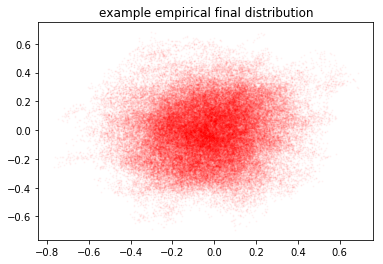

In [5]:
plt.title("example empirical final distribution")
plt.plot(points[0], points[1], 'ro', markersize = 1, alpha = 0.03)
plt.savefig("final_example.png")
plt.show()

In [6]:
def get_average_square(points):
    return np.mean(points[0] * points[0]) + np.mean(points[1] * points[1])

In [7]:
lrs = []
squares = []
for lr in tqdm(np.linspace(1e-2, 1e-1, 20)):
    points = collect_points(int(1e5), int(1e4), G, lr, np.array([0.0, 0.0]), covariation, show_progress = False)
    lrs.append(lr)
    squares.append(get_average_square(points))
    

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

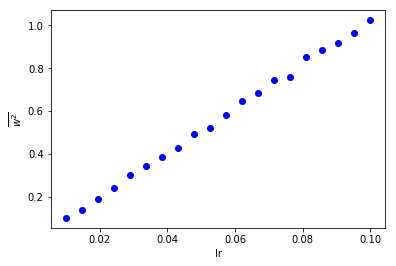

In [9]:
plt.plot(lrs, squares, 'bo')
plt.xlabel("lr")
plt.ylabel(r"$\overline{w^2}$")
plt.savefig("empirical_dependence.png")
plt.show()